# Understanding Batch size


In [1]:
from sklearn.datasets import make_blobs  
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot as plt

In [2]:
# here we are using make_blobs function to generate random dataset of scattered values
def prepare_data():
       
        X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

        y = to_categorical(y)

        # split into train and test
        n_train = 500
        X_train, X_test = X[:n_train, :], X[n_train:, :]
        y_train, y_test = y[:n_train], y[n_train:]
        return X_train, y_train, X_test, y_test


In [3]:
def fit_model(X_train, y_train, X_test, y_test, n_batch):
        
        model = Sequential()
        model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(3, activation='softmax'))  #Predict the 3 classes

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1, batch_size=n_batch)
        
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='test')
        plt.title('batch='+str(n_batch), pad=-40)


In [4]:
X_train, y_train, X_test, y_test = prepare_data()

Epoch 1/5
125/125 [==============================] - 2s 6ms/step - loss: 2.4259 - accuracy: 0.4500 - val_loss: 0.9819 - val_accuracy: 0.6500
Epoch 2/5
125/125 [==============================] - 0s 4ms/step - loss: 0.9048 - accuracy: 0.6240 - val_loss: 0.7831 - val_accuracy: 0.6580
Epoch 3/5
125/125 [==============================] - 1s 4ms/step - loss: 0.7426 - accuracy: 0.6560 - val_loss: 0.6743 - val_accuracy: 0.7680
Epoch 4/5
125/125 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6920 - val_loss: 0.6123 - val_accuracy: 0.7080
Epoch 5/5
125/125 [==============================] - 0s 4ms/step - loss: 0.6246 - accuracy: 0.7160 - val_loss: 0.5870 - val_accuracy: 0.7340
Epoch 1/5
63/63 [==============================] - 1s 8ms/step - loss: 1.8679 - accuracy: 0.4260 - val_loss: 1.0438 - val_accuracy: 0.5460
Epoch 2/5
63/63 [==============================] - 0s 4ms/step - loss: 0.8528 - accuracy: 0.5680 - val_loss: 0.6925 - val_accuracy: 0.7160
Epoch 3/5
63/63 [

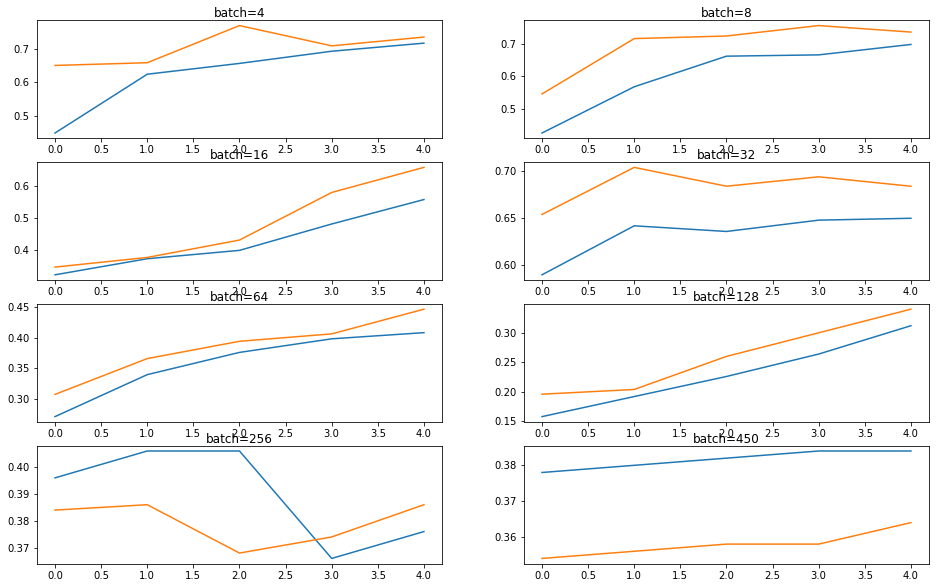

In [5]:
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
plt.figure(figsize=(16,10))
for i in range(len(batch_sizes)):
        plot_no = 420 + (i+1)   
        plt.subplot(plot_no)
    
        fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])
